In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

## Получение данных

Будем работать с набором данных для задачи регрессии (целевая переменная - стоимость дома) `california_housing`, который можно получить из стандартных датасетов в `sklearn'e`.

После `fetch_california_housing()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [6]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Чтобы более наглядно смотреть, как обучается дерево решений возьмем только 5 объектов.

In [7]:
features = ['HouseAge', 'Population']

In [8]:
df = df[features + ['target']]
df = df.head(5)
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [9]:
X = df[features]
y = df['target']

## Обучение дерева решений

Инициализируем дерево решений для задачи регрессии и обучим на признаках (`X`) и целевой переменной (`y`). По признакам модель будет запоминать закономерности, которые ведут к изменению стоимости дома.

In [10]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Теперь визуализируем наше обученное дерево решений. Узлы (ноды), где находится вопрос - называются вершинами, а где вопросов больше нет - это лист. В каждом узле хранятся объекты и предсказания, которые строятся как среднее по всем объектам, которые попали в этот узел.

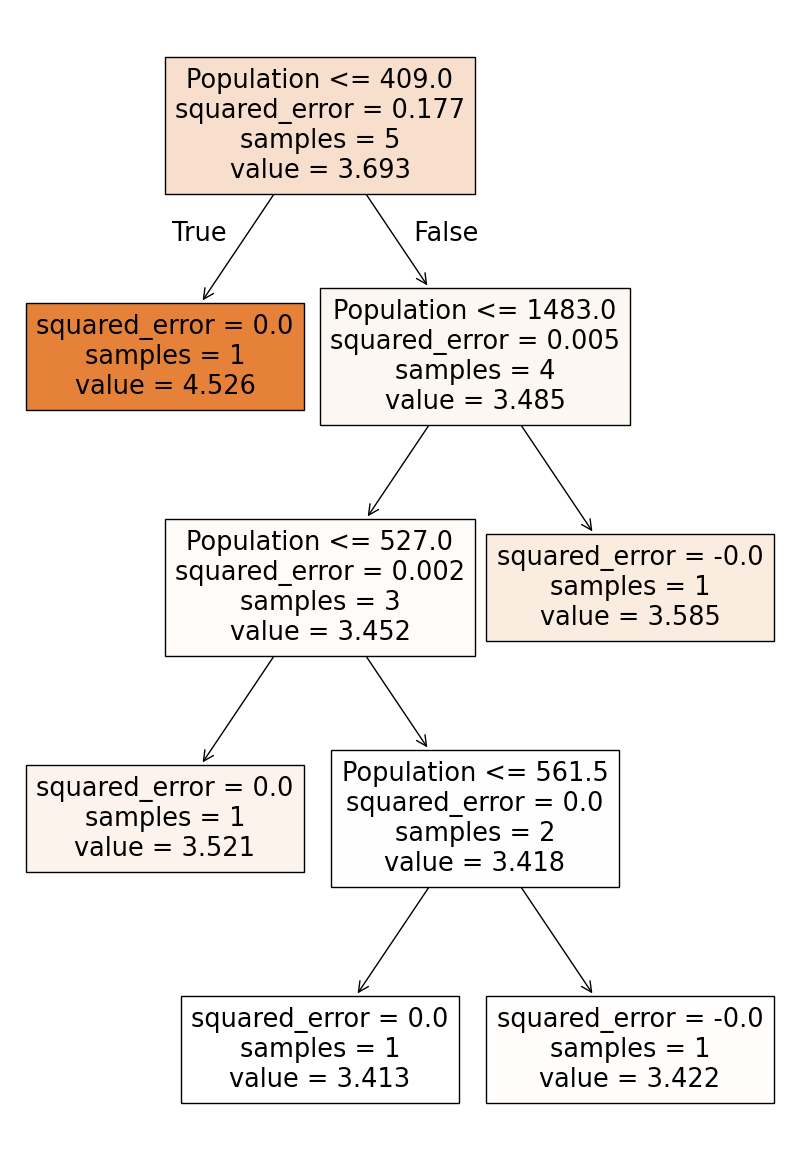

In [11]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True);

Как же оно обучилось?

Чтобы наилучшим образом предсказывать стоимость дома, надо ввести функцию потерь - ошибка, которую мы будем стараться минимизировать. Ведь хочется, чтобы предсказанная стоимость дома совпадала с истинным значением.

In [12]:
y

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

### Средне-квадратичная ошибка

 Возьмем среднеквадратичную ошибку (mean squared error).

 $MSE = \frac{1}{n}\sum_i^n{(y_{true} - y_{pred})^2}$

In [13]:
import numpy as np


def mse(true, pred):
    return np.mean(np.square(true - pred))

### Population <= 409

Наше обученное дерево решило, что самый лучший первый вопрос к нашим данным - это Population <= 409. В этом случае происходит разбиение на две выборки:   

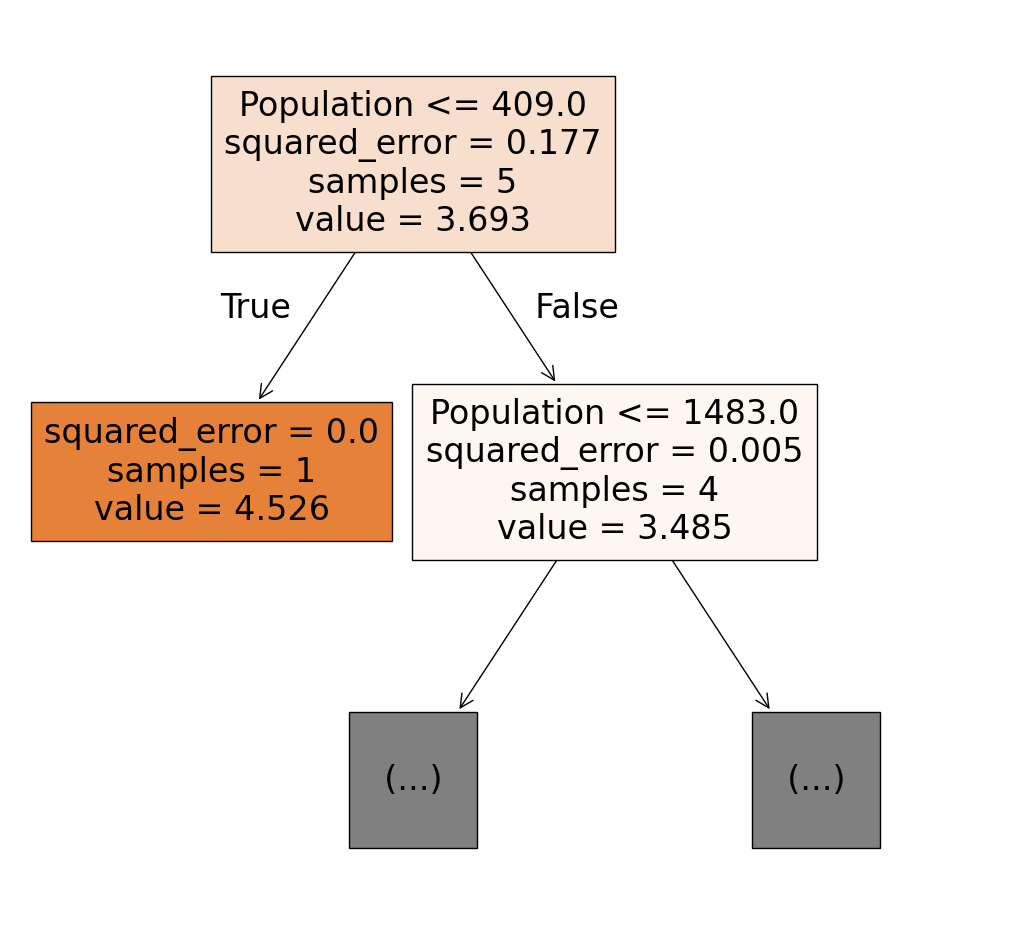

In [14]:
plt.figure(figsize=(13, 12))
plot_tree(tree, feature_names=features, filled = True, max_depth=1);

In [15]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


В одной 1 объект, который удовлетворяет этому условию.

In [16]:
df[df.Population <= 409]

,HouseAge,Population,target
0,41.0,322.0,4.526


Во второй 4 объекта, которые не следует этому условию.

In [17]:
df[~(df.Population <= 409)]

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


#### Корневой узел

Теперь можем посчитать среднеквадратичную ошибку в корневом узле, где находятся все 5 объектов. Считаем, что предсказание стоимости дома в этом узле - это среднее всех целевых переменных объектов, которые в узле находятся.

$$pred = \frac{4.526 + 3.585 + 3.521 + 3.413 + 3.422}{5} = 3.6934$$


In [18]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


$$MSE = \frac{(4.526 - 3.6934)^2 + (3.585- 3.6934)^2 + (3.521-3.6934)^2 + (3.413-3.6934)^2 + (3.422-3.6934)^2}{5} = 0.17739$$


In [19]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


И ошибка, и среднее значение целевой переменной совпали с теми, что визуализировались на дереве решений в самом перевом узле.

Посмотрим, насколько уменьшается ошибка, если данным задать вопрос Population <= 409.

In [20]:
df_left = df[df.Population <= 409]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526


#### Левая выборка

В первой выборке 1 объект и его среднеквадратичная ошибка равна:


$$pred = \frac{4.526}{1} = 4.526$$


$$MSE = \frac{(4.526 - 4.526)^2}{1} = 0$$



In [21]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 4.526
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.0


#### Правая выборка

Во второй правой выборке 4 объекта и их среднеквадратичная ошибка равна:

$$pred = \frac{3.585 + 3.521 + 3.413 + 3.422}{4} = 3.4852$$



$$MSE = \frac{(3.585- 3.4852)^2 + (3.521-3.4852)^2 + (3.413-3.4852)^2 + (3.422-3.4852)^2}{4} = 0.00511$$


In [22]:
df_right = df[~(df.Population <= 409)]
df_right

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [23]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_right}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 3.48525
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.005112187499999999


#### Прирост информации

Теперь хочется в целом понять, насколько данное разбиение помогает нам уменьшить ошибку, для этого нужно ввести понятие "прирост информации" (information gain). Он считается, как

$$IG = MSE_{root} - (\frac{n_{left}}{n}MSE_{left} + \frac{n_{right}}{n}MSE_{right})$$
где $n_{left}$ - это количество объектов в левой ветке, $n_{right}$ - это количество объектов в правой ветке, а $n$ - количество объектов в корневом узле.


$$IG = 0.17739 - (\frac{1}{5} * 0 + \frac{4}{5} * 0.00511) = 0.1733$$

In [24]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

np.float64(0.17330568999999993)

### HouseAge <= 50

А теперь попробуем другой вопрос, не тот, который выбрался самым лучшим по мнению этого дерева решений. К примеру, возьмем вопрос HouseAge <= 50.

В левой ветке 1 объект, который удовлетворяет этому условию.

In [25]:
df[df.HouseAge <= 50]

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


В правой ветке 3 объекта, которые не следует этому условию.

In [26]:
df[~(df.HouseAge <= 50)]

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


#### Корневой узел

Считаем среднеквадратичную ошибку в корневом узле, где находятся все 5 объектов, она будет такой же, как мы получали выше, потому что объекты в корне никак не меняются.

$$pred = \frac{4.526 + 3.585 + 3.521 + 3.413 + 3.422}{5} = 3.6934$$


$$MSE = \frac{(4.526 - 3.6934)^2 + (3.585- 3.6934)^2 + (3.521-3.6934)^2 + (3.413-3.6934)^2 + (3.422-3.6934)^2}{5} = 0.17739$$


In [27]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


In [28]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


#### Левая выборка

Глянем на то, насколько уменьшается ошибка, если задаем вопрос HouseAge <= 50.

In [29]:
df_left = df[df.HouseAge <= 50]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


$$pred = \frac{4.526 + 3.585}{2} = 4.0555$$



$$MSE = \frac{(3.585- 4.0555)^2 + (3.521-4.0555)^2}{2} = 0.2213$$


In [30]:
print(f"Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно 4.0555
Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна 0.22137024999999994


#### Правая выборка

In [31]:
df_right = df[~(df.HouseAge <= 50)]
df_right

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


$$pred = \frac{3.521 + 3.413 + 3.422}{3} = 3.452$$



$$MSE = \frac{(3.521-3.4852)^2 + (3.413-3.4852)^2 + (3.422-3.4852)^2}{3} = 0.00239$$




In [32]:
print(f"Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна {mse_right}")

Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно 3.452
Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна 0.0023939999999999977


#### Прирост информации

И считаем прирост информации, чтобы объединить 3 значения среднеквадратичной ошибки в одно общее.


$$IG = 0.17739 - (\frac{2}{5} * 0.2213 + \frac{3}{5} * 0.00239) = 0.08743$$

In [34]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

np.float64(0.08741093999999995)

$$IG_{\text{population}} = 0.1733$$
$$IG_{\text{house_age}} = 0.08743$$
$$IG_{\text{population}} > IG_{\text{house_age}}$$

Прирост информации при вопросе HouseAge <= 50 получился меньше, чем при вопросе Population <= 409, значет выгодней задавать вопрос, связанный с населением.   


## Процесс построения дерева

Продемонстрируем процесс обучения дерева решения.

Дерево, чтобы получить самый полезный вопрос, проходится по всем признакам и по всем уникальным значениям в нём (либо по среднем между значениями) и выбирает тот вопрос, у которого прирост информации получился выше.

In [35]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


Сначала проход будет сделан по признаку HouseAge, найдутся все значения, при которых получаются уникальные разбиения.

In [36]:
split_values = sorted(df.HouseAge.unique())
split_values

[np.float64(21.0), np.float64(41.0), np.float64(52.0)]

Можем сделать два уникальных разбиения:
1. с вопросом HouseAge <= 21

In [37]:
display(df[(df['HouseAge'] <= 21)], df[~(df['HouseAge'] <= 21)])

,HouseAge,Population,target
1,21.0,2401.0,3.585


,HouseAge,Population,target
0,41.0,322.0,4.526
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


2. с вопросом HouseAge <= 41

In [38]:
display(df[(df['HouseAge'] <= 41)], df[~(df['HouseAge'] <= 41)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


Вопрос HouseAge <= 52 не имеет смысла, т.к. все объекты оказываются в левой ветке.

In [39]:
display(df[(df['HouseAge'] <= 52)], df[~(df['HouseAge'] <= 52)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


,HouseAge,Population,target


In [40]:
def get_information_gain(df, feature, split):
    df_left, df_right = df[(df[feature] <= split)], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root = mse(df['target'], df['target'].mean())
    mse_left = mse(df_left['target'], df_left['target'].mean())
    mse_right = mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
    print(f'Прирост информации при вопросе {feature} <= {split} равен {ig}')
    return ig

In [41]:
information_gains = {}

In [42]:
feature = 'HouseAge'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе HouseAge <= 21.0 равен 0.0029376399999999636
Прирост информации при вопросе HouseAge <= 41.0 равен 0.08741093999999995


In [43]:
split_values = sorted(df.Population.unique())
split_values

[np.float64(322.0),
 np.float64(496.0),
 np.float64(558.0),
 np.float64(565.0),
 np.float64(2401.0)]

In [44]:
feature = 'Population'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе Population <= 322.0 равен 0.17330568999999993
Прирост информации при вопросе Population <= 496.0 равен 0.07264400666666662
Прирост информации при вопросе Population <= 558.0 равен 0.024041339999999994
Прирост информации при вопросе Population <= 565.0 равен 0.0029376399999999636


Теперь найдем максимальный прирост информации для нашего первого вопроса.

In [45]:
max(information_gains, key=information_gains.get)

'Population <= 322.0'

Получилось, что самый полезный вопрос - Population <= 322.

По поводу того, что наш вопрос не совпал с вопросом из дерева с sklearn:   
Мы брали уникальные значения признака, как пороговые значения, а в sklearn'e берутся средние арифметические двух значений, как раз вопрос Population <= 409 получился от значений 322 и 496 (т.к. $\frac{322 + 496}{2} = 409$), но при этом разбиения получаются одинаковые:

In [46]:
display(df[(df['Population'] <= 409)], df[~(df['Population'] <= 409)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [47]:
display(df[(df['Population'] <= 322)], df[~(df['Population'] <= 322)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422
